# 스튜던트 t 분포

## 팻-테일(Fat tail) 현상

여러가지 데이터 분포를 살펴보면 가우시안 정규분포와 상당히 유사하지만 양 끝단의 비중이 정규 분포에 비해 더 큰 데이터들을 발견할 수 있다. 정규 분포라 가정했을 때보다 극단적 현상이 더 자주 발생한다는 뜻이다. 분포의 모양을 볼 때 양 끝(꼬리) 부분이 정규 분포보다 두껍다고 해서 이를 팻 테일(fat tail 현상이라고 한다. 예를 들어 주식의 수익률은 보통 정규 분포를 따르는 것으로 가정하는데 실제로는 정규분포에서는 자주 발생할 수 없는 극단적인 사건들이 종종 발생하곤 한다. 금융시장에서는 이러한 현상을 블랙 스완(black swan)이라고도 한다. 실제로 과거의 주가 데이터를 확인해 보자.

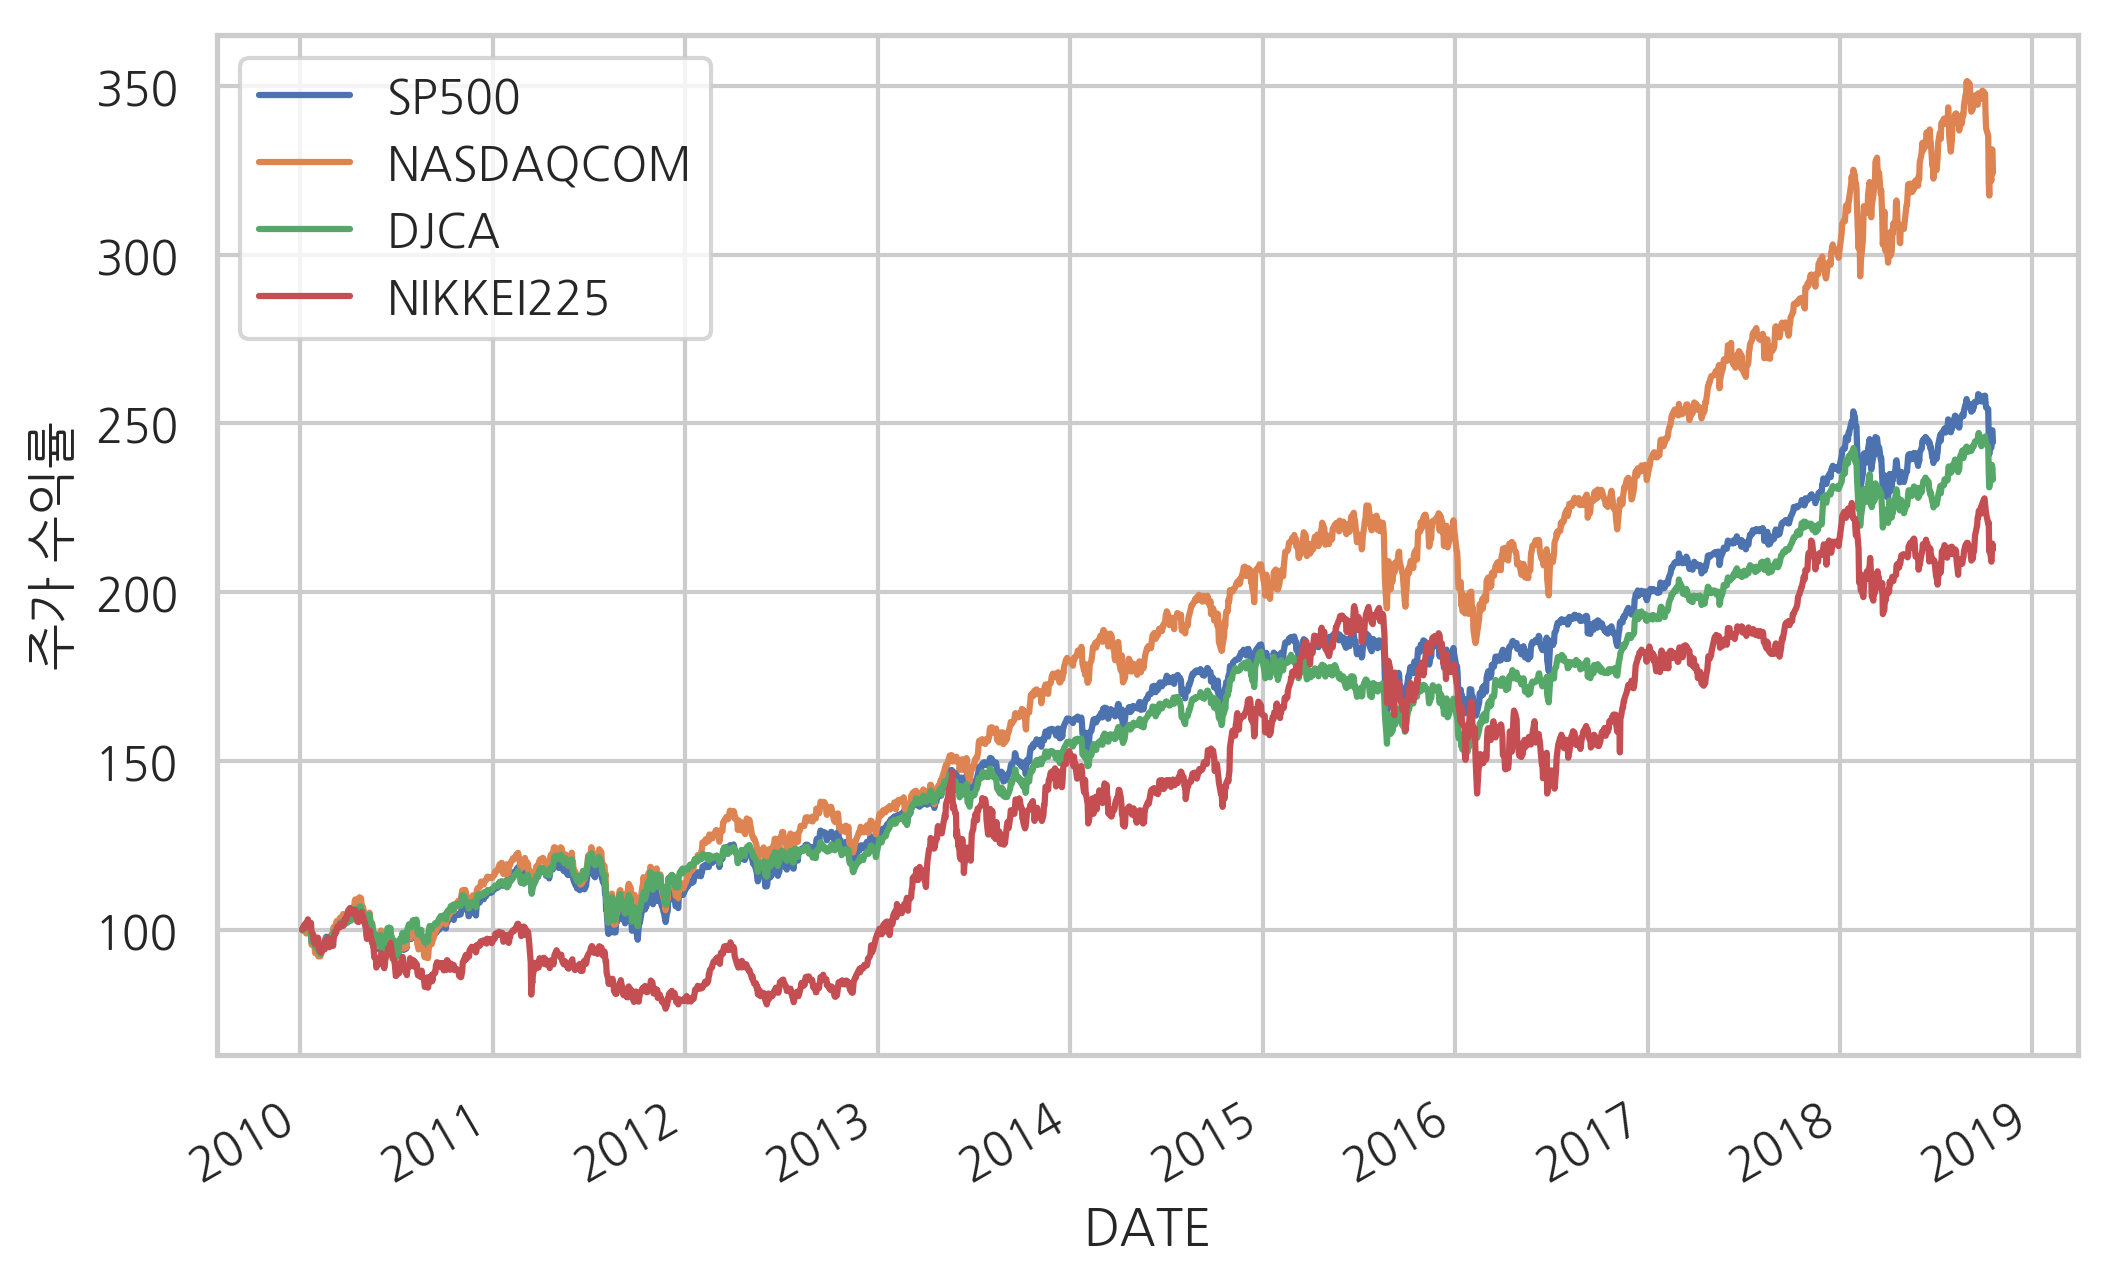

In [1]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()
plt.ylabel("주가 수익률")
plt.show()

수익률 분포의 모양을 히스토그램으로 그리면 정규분포와 비슷하게 생겼다.

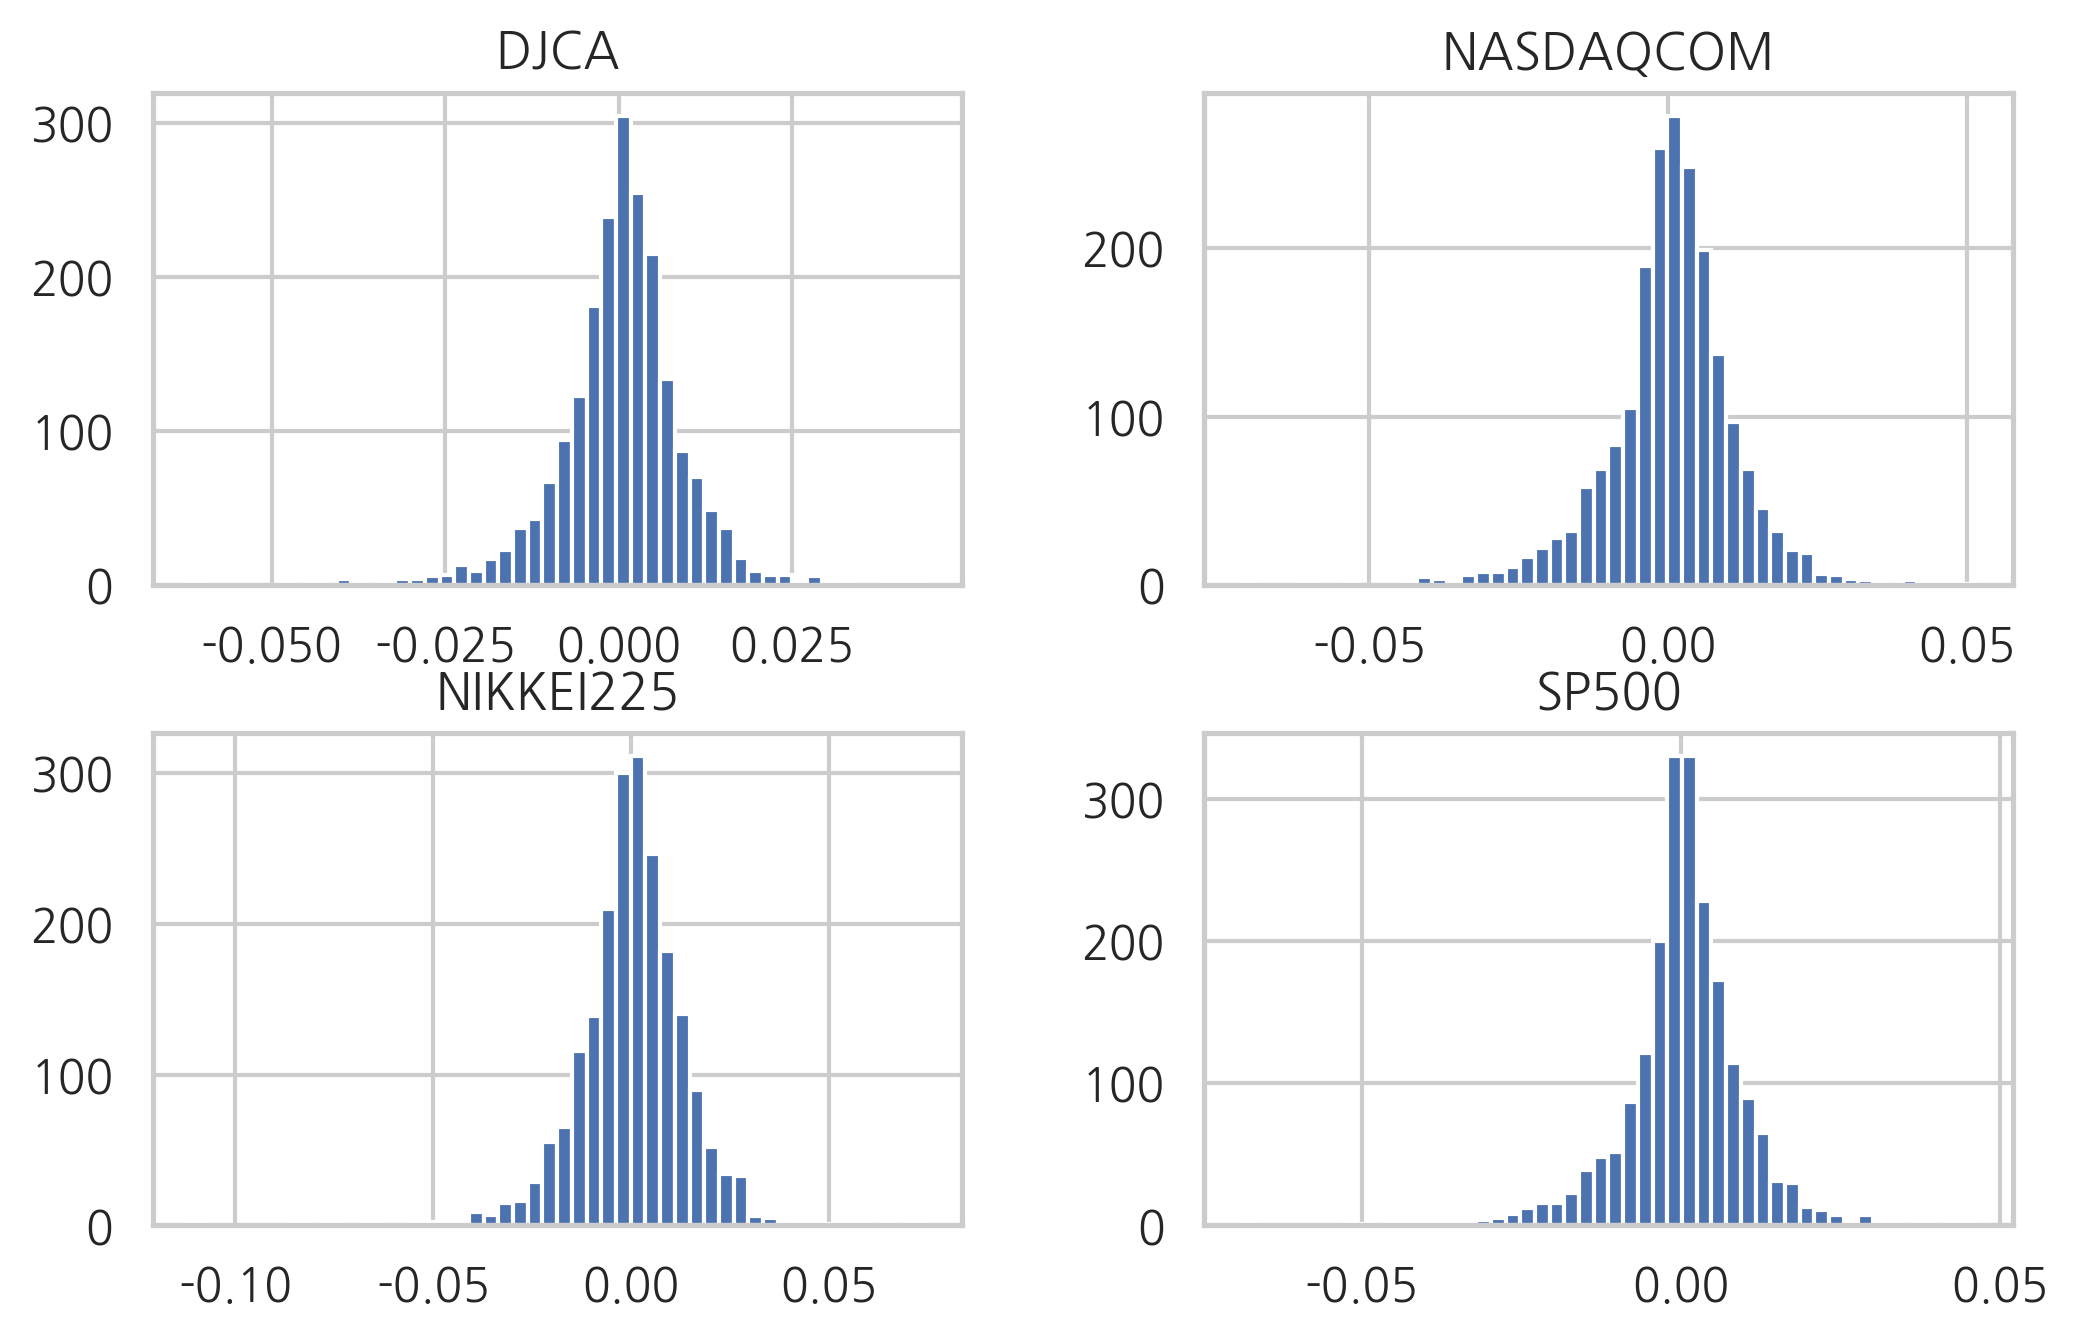

In [2]:
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

하지만 Q-Q 플롯으로 정규성을 확인하면 정규 분포보다 더 극단적인 경우들이 많이 발생하고 있음을 알 수 있다.

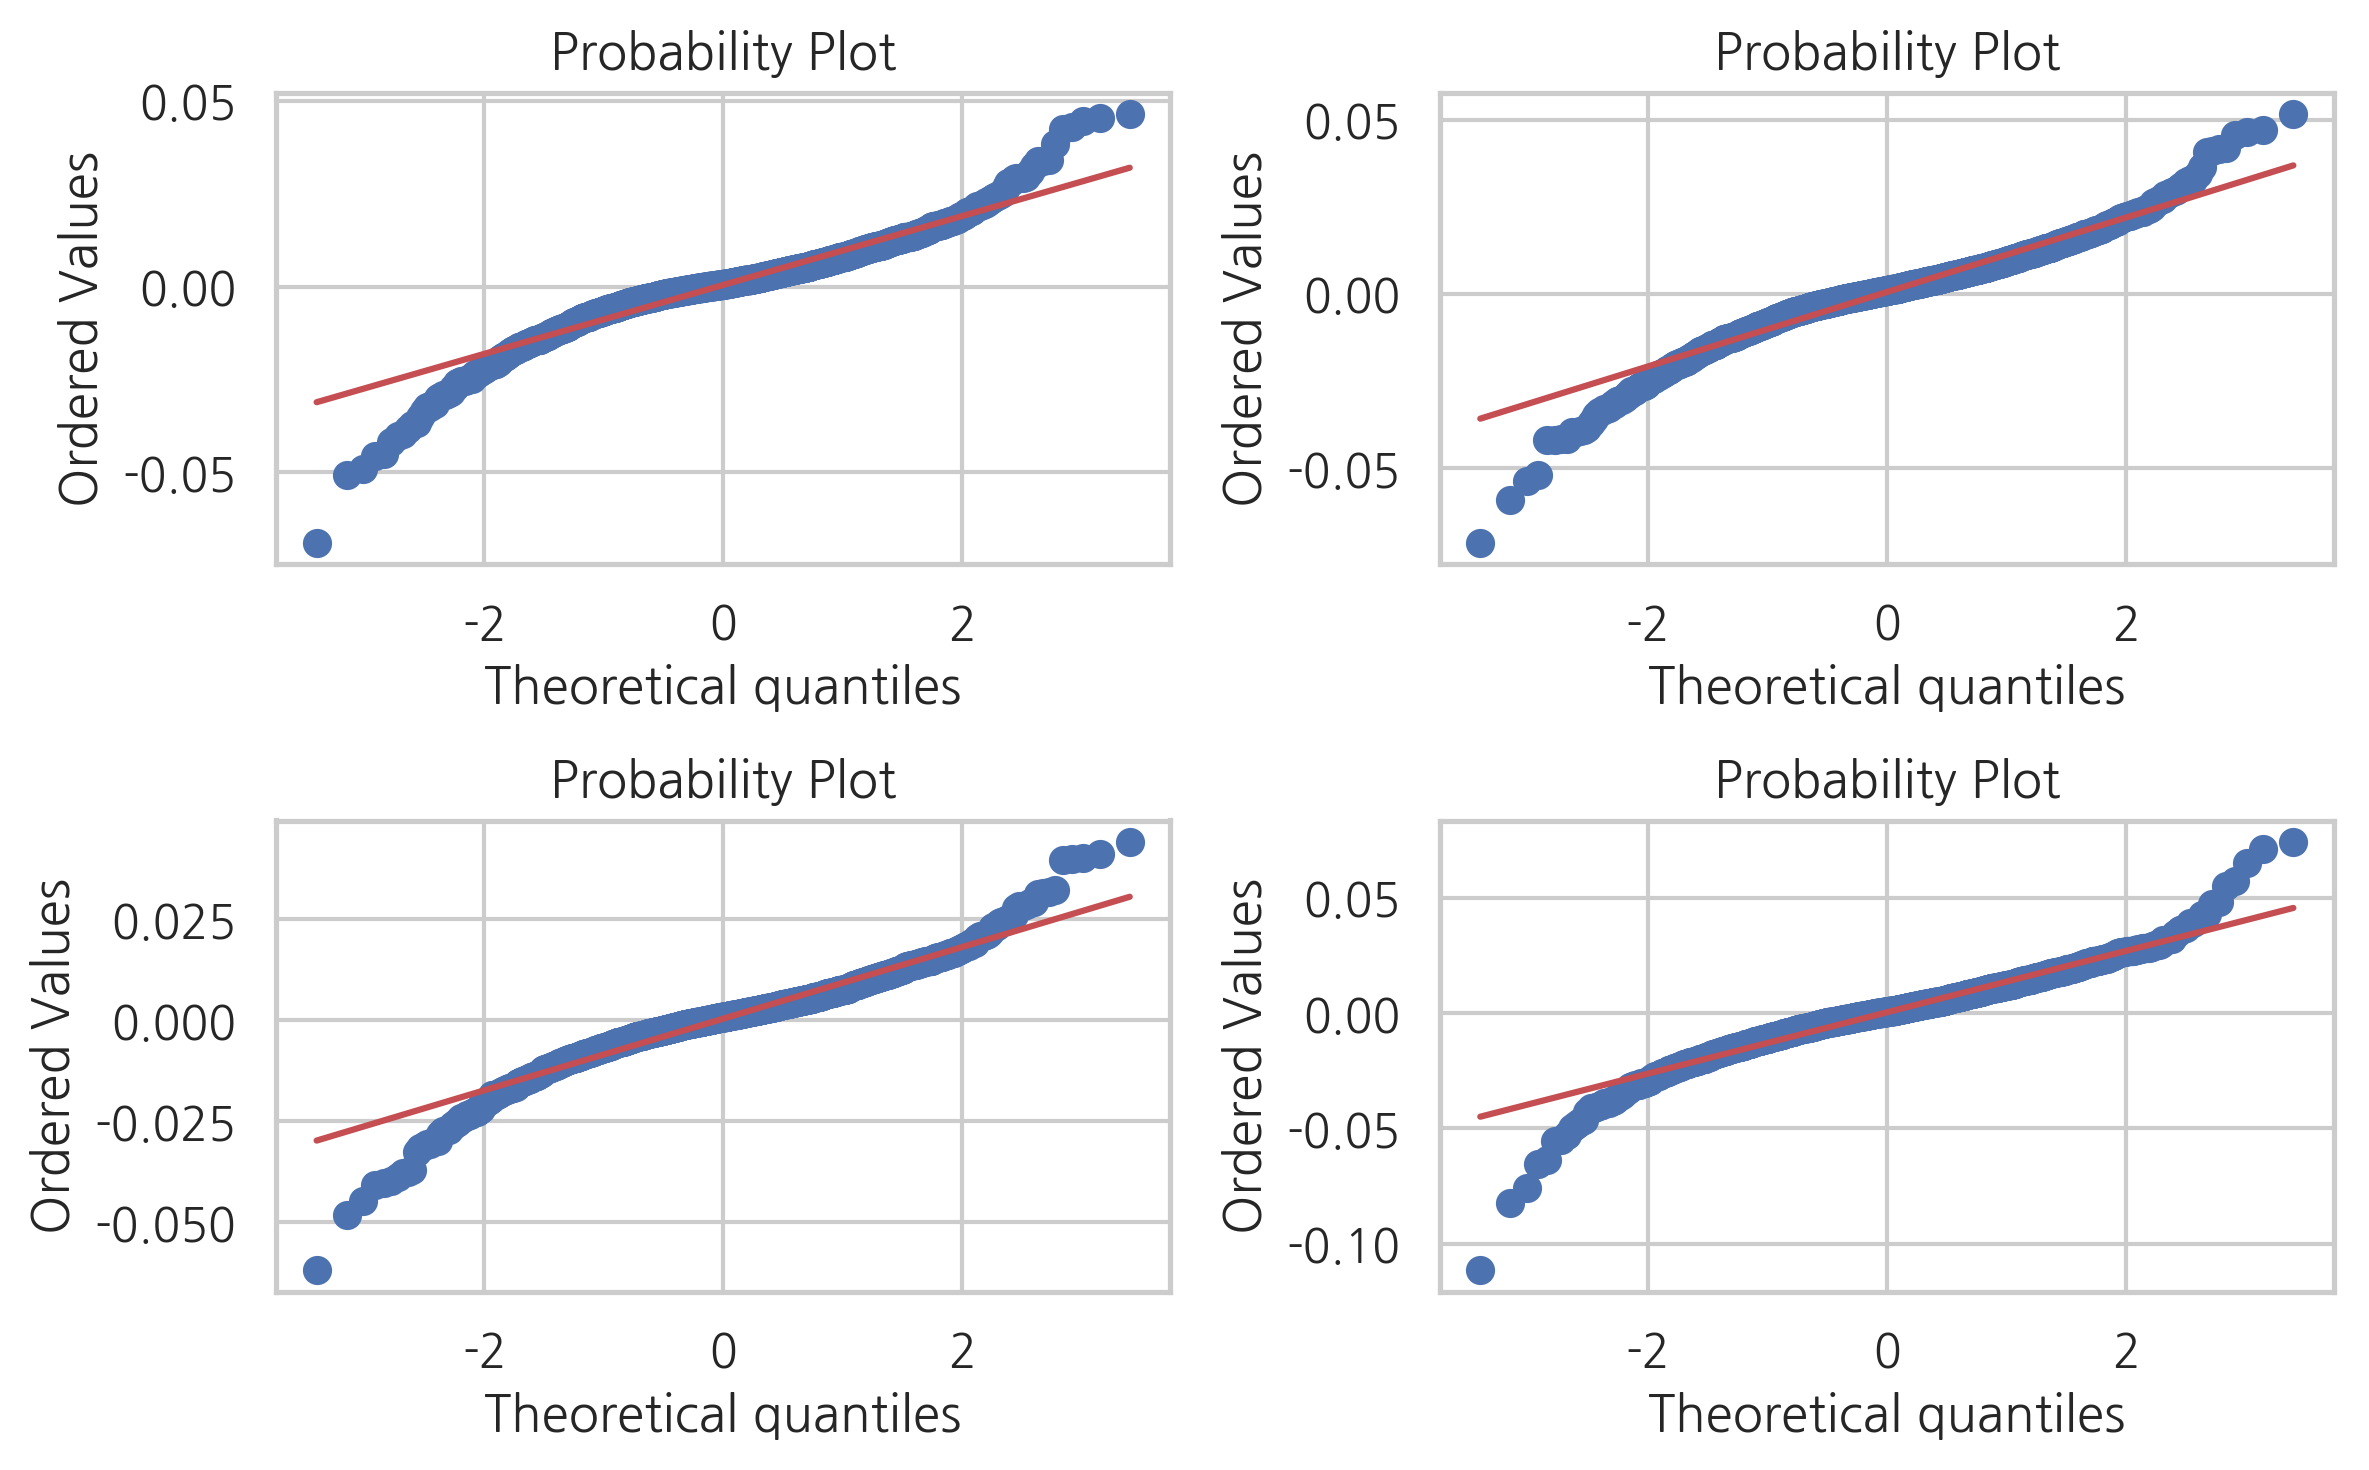

In [3]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

이렇게 팻-테일을 보이는 데이터의 모형에 적합한 것이 **스튜던트 t 분포(student-t distribution)**이다.

## 스튜던트 t 분포

스튜던트 t 분포의 확률 밀도 함수는 다음 수식에 의해 정의된다. 가우시안 정규 분포와 달리 정수값을 가지는 **자유도(degree of freedom)**라는 모수(parameter) $\nu$를 추가적으로 가진다.

$$ t(x;\mu, \sigma^2, \nu) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)} {\sqrt{\nu\pi}\Gamma\left(\frac{\nu}{2}\right)} \left(1+\frac{(x-\mu)^2}{\nu\sigma^2} \right)^{-\frac{\nu+1}{2}} $$


이 식에서 $\Gamma(x)$는 감마(Gamma) 함수라는 특수 함수이다.

$$ \Gamma(x) = \int_0^\infty  u^{x-1} e^{-u} du $$

스튜던트 t 분포의 확률 밀도 함수를 그리려면 SciPy 패키지의 `t` 명령을 사용한다. 이 때 인수 `df`는 자유도, `loc`는 기댓값, `scale`은 표준편차를 설정한다.
그림에서 자유도 $\nu$가 작으면 가우시안 정규 분포보다 분산이 크고 fat tail을 보이지만  자유도가 증가할수록 가우시안 정규 분포로 수렴하는 것을 볼 수 있다.

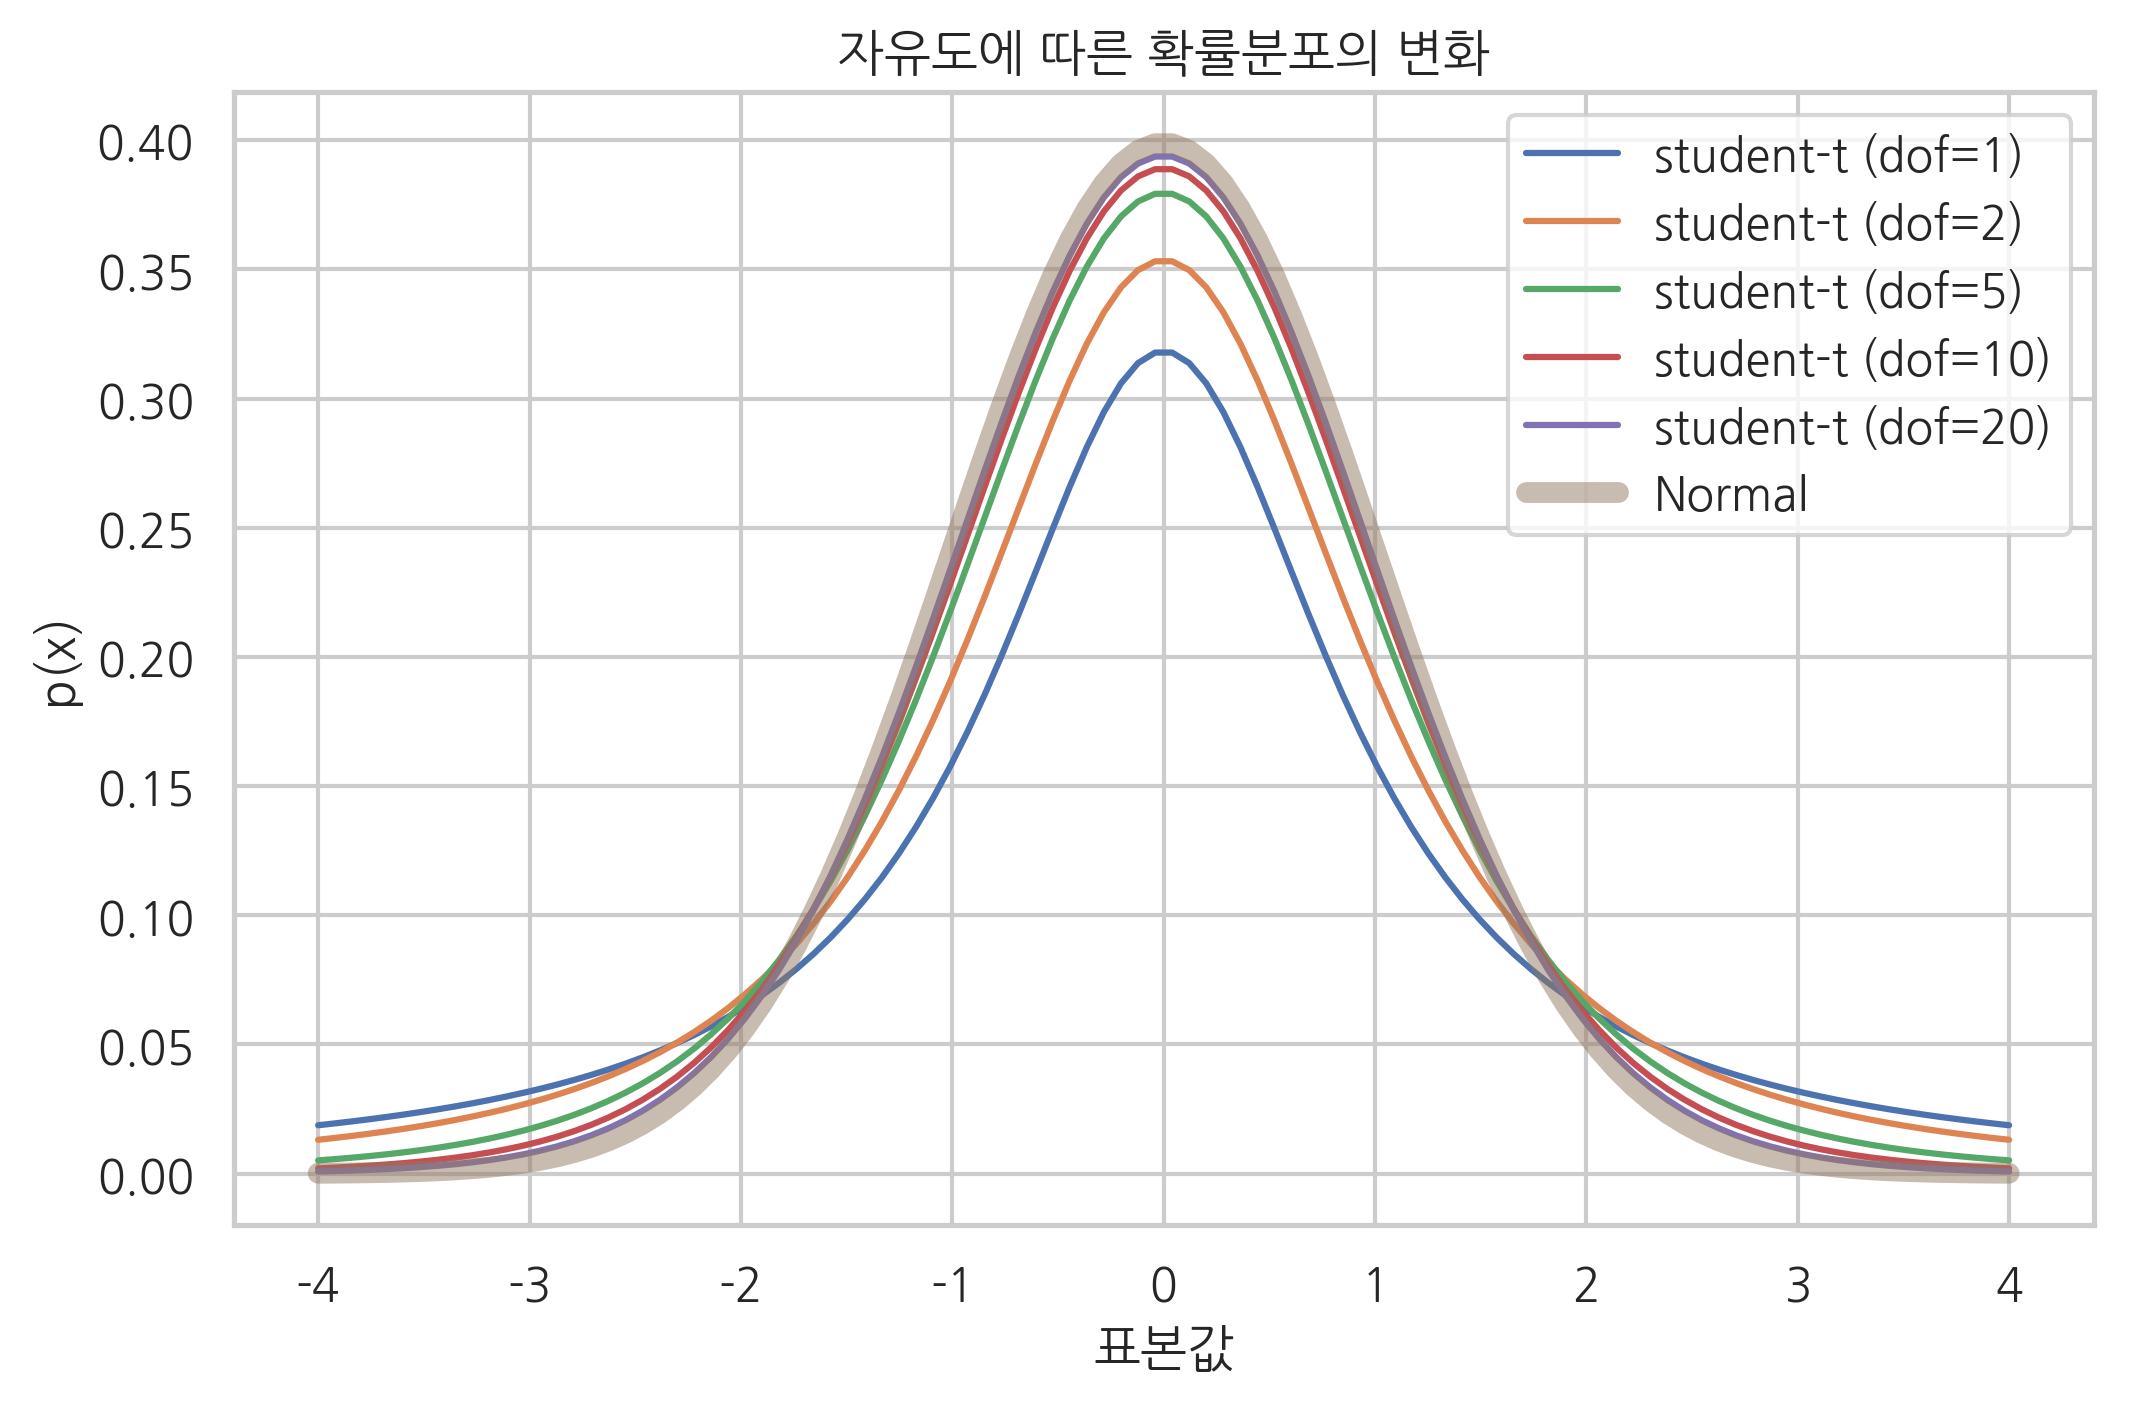

In [4]:
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=("student-t (dof=%d)" % df))
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.title("자유도에 따른 스튜던트 t 확률분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

## 모멘트

스튜던트 t 분포의 기댓값과 분산은 다음과 같다.

* 기댓값: 
$$\text{E}[X] = \mu $$

* 분산: ($\nu > 2$ 인 경우만 적용됨. $\nu=1,2$일 때는 분산이 무한대)
$$ \text{Var}[X] = \dfrac{\nu \sigma^2}{\nu-2} $$


## 통계량 분포

가우시안 정규 분포의 표본을 표준편차로 나우어 정규화한 $z$ 통계량은 항상 가우시안 정규 분포가 된다는 것은 이미 공부하였다. 그런데 $z$ 통계량을 구하려면 확률분포의 정확한 표준편차를 우리가 알고 있어야 한다. 하지만 현실적으로는 확률분포에 대한 정확한 지식이 없기 때문에 표본에서 측정한 표본표분편차(sample standard deviation)로 정규화할 수 밖에 없다. 가우시안 정규 분포로부터 얻은 $N$개의 표본 $x_1, \cdots, x_N$에서 계산한 **표본평균을 표본표준편차로 정규화한 값**을 $t$ 통계량이라고 한다.

$t$ 통계량은 자유도가 $N-1$인 스튜던트 t 분포를 이룬다. 

$$  t = \frac{\bar{x} - \mu}{\dfrac{s}{\sqrt{N}}} \sim t \, (x; 0, 1, N - 1) $$

이 식에서 $ \bar{x}, s$은 각각 표본평균, 표본표준편차다.

$$ \bar{x} = \frac{x_1+\cdots+x_N}{N}  $$

$$ s^2 = \frac{1}{N-1}\sum_{i=1}^N (x_i - \bar{x})^2 $$

이 정리는 추후 정규 분포의 기댓값에 관한 각종 검정(testing)에서 사용된다.

다음은 시뮬레이션을 사용하여 표본표준편차로 정규화한 표본평균과 정규 분포를 비교한 것이다. 왼쪽은 $N=4$, 오른쪽은 $N=40$인 경우이다.

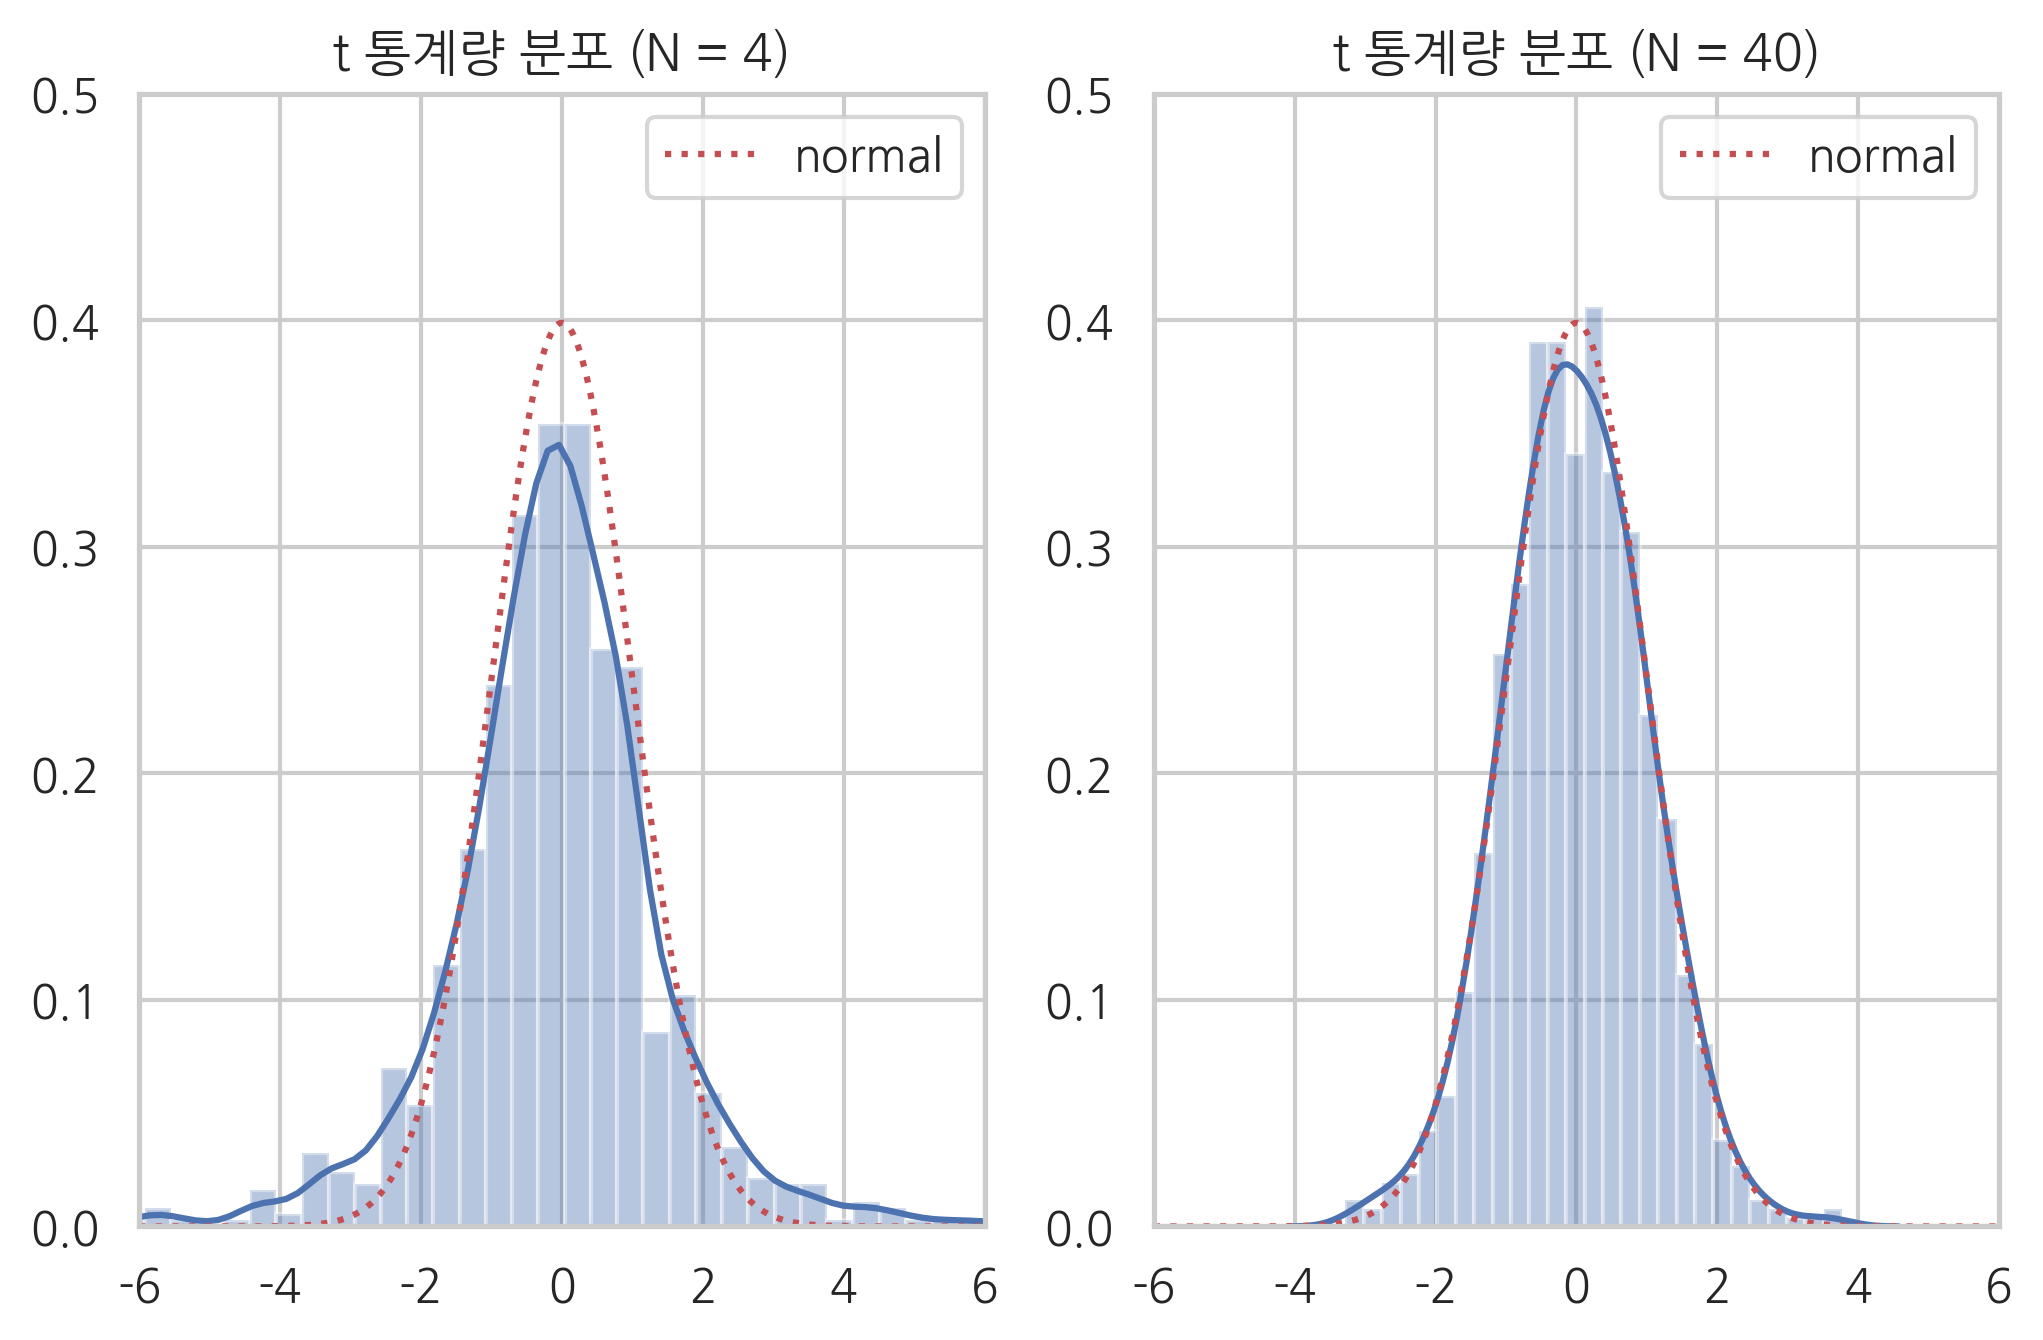

In [7]:
np.random.seed(0)

rv = sp.stats.norm()
M = 1000

plt.subplot(1, 2, 1)
N = 4
x1 = rv.rvs((N, M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="normal")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N = 4)")
plt.legend()

plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="normal")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N = 40)")
plt.legend()

plt.show()